In [1]:
from distutils.dist import command_re
from imghdr import test_rast

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import satpy
import metpy
from pathlib import Path
from SARS.satellite_data_processor import pixel_selector, parse_wavelength
from SARS.sat_info import *
from satpy.enhancements.enhancer import get_enhanced_image
from trollimage.xrimage import XRImage


In [27]:
data_dir = Path('~/Downloads/sars_p1_data/processed_output').expanduser()
corrected_data_paths = sorted(data_dir.glob('*_corrected*'))
uncorrected_data_paths = sorted(data_dir.glob('*_unc*'))
all_data_paths = sorted(data_dir.glob('*.nc'))
sentinel2b_files = sorted(data_dir.glob("*sentinel*_cor*"))
terra_files = sorted(data_dir.glob("*terra*.nc"))

In [3]:
for filename in all_data_paths:
    name = filename.name
    print(name)

noaa20_VIIRS_corrected_A2024129_0730.nc
noaa20_VIIRS_corrected_A2025122_1154.nc
noaa20_VIIRS_corrected_A2025199_1954.nc
noaa20_VIIRS_uncorrected_A2024129_0730.nc
noaa20_VIIRS_uncorrected_A2025122_1154.nc
noaa20_VIIRS_uncorrected_A2025199_1954.nc
sentinel2b_MSI_corrected_T11VNJ.nc
sentinel2b_MSI_corrected_T11VPL.nc
sentinel2b_MSI_corrected_T33QXU.nc
sentinel2b_MSI_corrected_T44TMK.nc
sentinel2b_MSI_corrected_T44TML.nc
sentinel2b_MSI_corrected_T44TMM.nc
sentinel2b_MSI_corrected_T44TMN.nc
sentinel2b_MSI_corrected_T44TNN.nc
sentinel2b_MSI_corrected_T44TNP.nc
sentinel2b_MSI_corrected_T44TNQ.nc
sentinel2b_MSI_uncorrected_T11VNJ.nc
sentinel2b_MSI_uncorrected_T11VPL.nc
sentinel2b_MSI_uncorrected_T33QXU.nc
sentinel2b_MSI_uncorrected_T44TMK.nc
sentinel2b_MSI_uncorrected_T44TML.nc
sentinel2b_MSI_uncorrected_T44TMM.nc
sentinel2b_MSI_uncorrected_T44TMN.nc
sentinel2b_MSI_uncorrected_T44TNN.nc
sentinel2b_MSI_uncorrected_T44TNP.nc
sentinel2b_MSI_uncorrected_T44TNQ.nc
terra_MODIS_corrected_A2024129_050

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-7.040459..0.8092671].


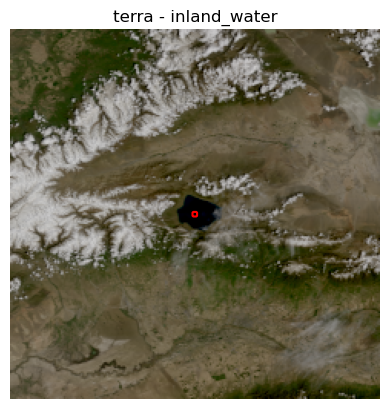

<Figure size 640x480 with 0 Axes>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-7.040459..0.851987].


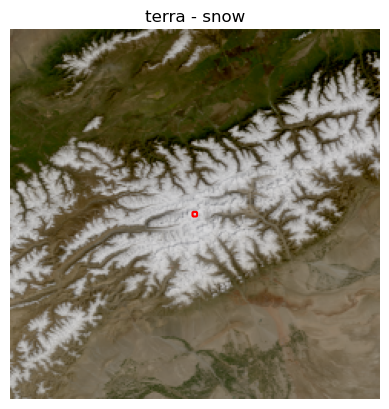

<Figure size 640x480 with 0 Axes>

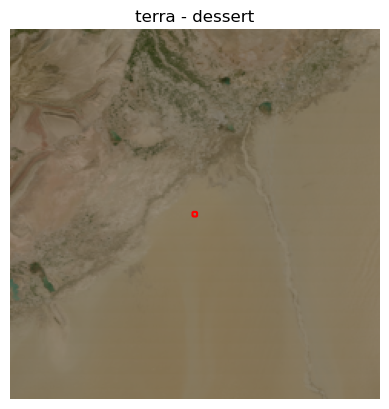

<Figure size 640x480 with 0 Axes>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.10955484..0.8459046].


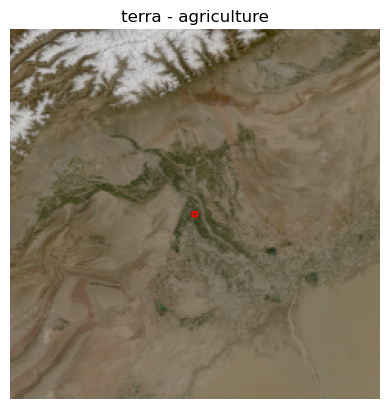

<Figure size 640x480 with 0 Axes>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-7.040459..0.8050607].


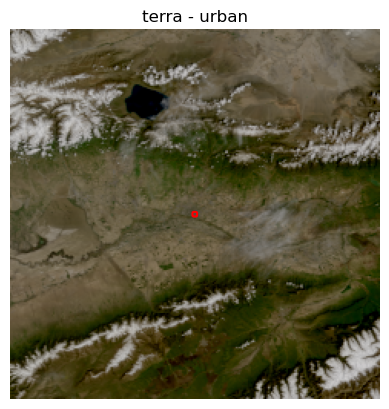

<Figure size 640x480 with 0 Axes>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-7.040459..0.851987].


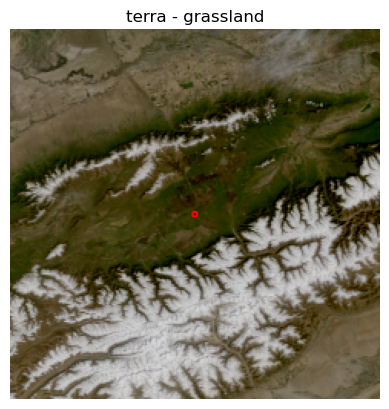

<Figure size 640x480 with 0 Axes>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-7.040459..0.8411556].


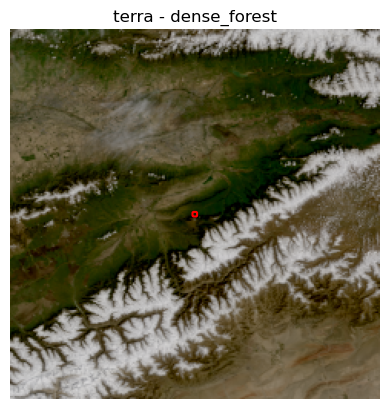

<Figure size 640x480 with 0 Axes>

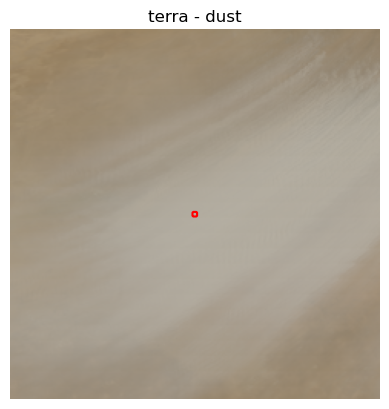

<Figure size 640x480 with 0 Axes>

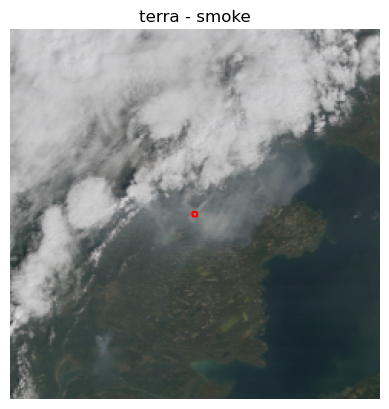

<Figure size 640x480 with 0 Axes>

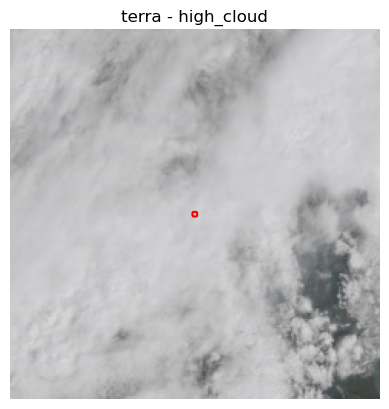

<Figure size 640x480 with 0 Axes>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-7.040459..0.8092671].


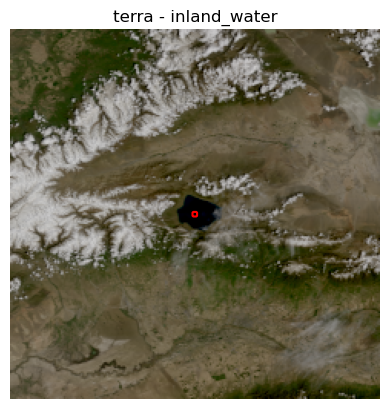

<Figure size 640x480 with 0 Axes>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-7.040459..0.851987].


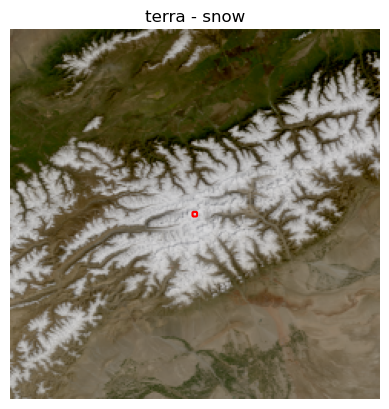

<Figure size 640x480 with 0 Axes>

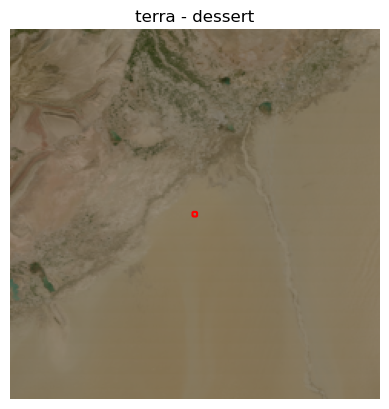

<Figure size 640x480 with 0 Axes>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.10955484..0.8459046].


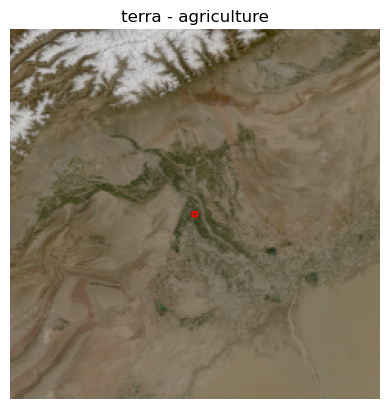

<Figure size 640x480 with 0 Axes>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-7.040459..0.8050607].


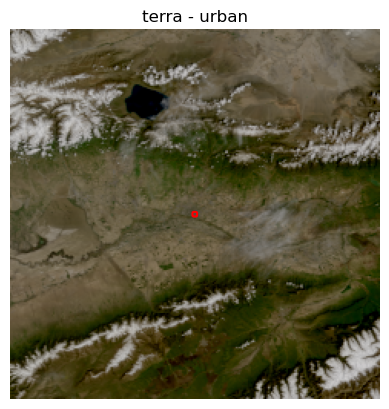

<Figure size 640x480 with 0 Axes>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-7.040459..0.851987].


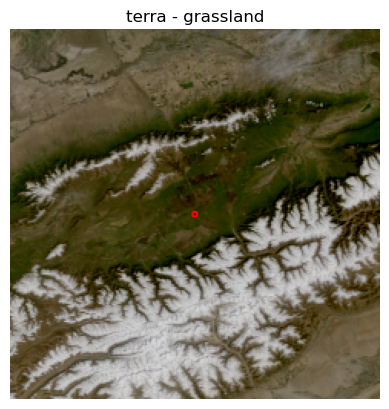

<Figure size 640x480 with 0 Axes>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-7.040459..0.8411556].


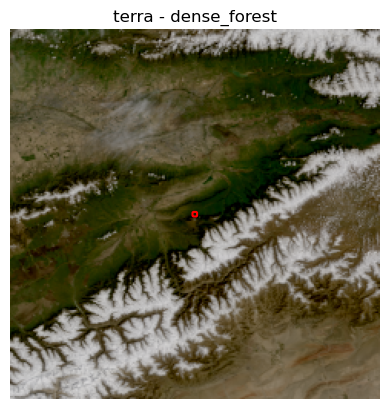

<Figure size 640x480 with 0 Axes>

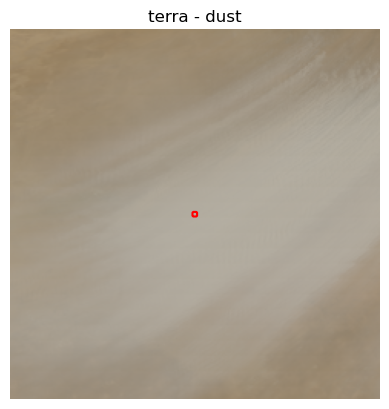

<Figure size 640x480 with 0 Axes>

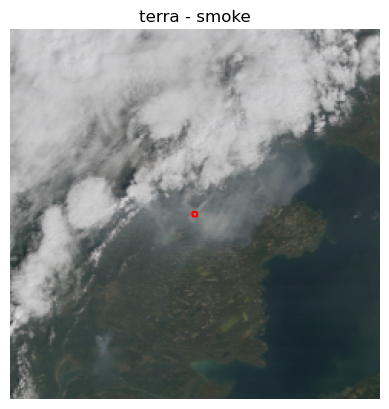

<Figure size 640x480 with 0 Axes>

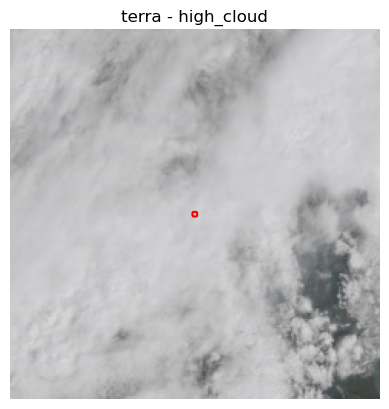

<Figure size 640x480 with 0 Axes>

In [28]:
import matplotlib.patches as mpatches

for file in terra_files:
    ds = xr.open_dataset(file)
    filename = file.name
    for pixel_class, latlon in satfile_pixel_class_points[filename].items():
        from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
        title = file.stem.split('_')[0] + f' - {pixel_class}'

        # Get zoomed region with a larger radius
        pixel_zoom, (ys, ye, xs, xe) = pixel_selector(ds, lat_lon_point=latlon, radius=120)
        pixel_outline, (ystart, yend, xstart, xend) = pixel_selector(ds, lat_lon_point=latlon, radius=1)

        img = get_enhanced_image(ds['true_color'])
        rgb = img.data.transpose('y', 'x', 'bands')
        img_zoom = get_enhanced_image(pixel_zoom['true_color'])
        rgb_zoom = img_zoom.data.transpose('y', 'x', 'bands')

        img_pixelz = get_enhanced_image(pixel_outline['true_color'])
        rgb_pixelz = img_pixelz.data.transpose('y', 'x', 'bands')

        class_mask = np.zeros(rgb.shape[:2], dtype=bool)
        class_mask[ystart:yend, xstart:xend] = True

        zoom_mask = class_mask[ys:ye, xs:xe]

        fig, ax = plt.subplots()
        ax.imshow(rgb_zoom)
        ax.contour(zoom_mask.astype(float), levels=[0.5], colors='red', linewidths=1.5)
        ax.axis('off')
        #
        # # Add inset axes (size and position: upper right corner)
        # axins = inset_axes(ax, width="30%", height="30%", loc='upper right')
        # axins.imshow(rgb_zoom)
        #
        # # Draw contour on the inset too (relative to the zoomed region)
        # axins.contour(zoom_mask.astype(float), levels=[0.5], colors='red', linewidths=1.5)
        # axins.axis('off')
        #
        # # Draw lines connecting the inset to the region in the main image
        # mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="yellow", linewidth=1)
        ax.set_title(title)

        plt.show()

        plt.tight_layout()
        plt.show()

In [5]:
# for cd in all_data_paths:
#     ds = xr.open_dataset(cd, engine='h5netcdf')
#     lat_min = ds['latitude'].min().item()
#     lat_max = ds['latitude'].max().item()
#     lon_min = ds['longitude'].min().item()
#     lon_max = ds['longitude'].max().item()
#     filename = cd.stem
#     print(filename, ' ----- longitude min-max ', (lon_min, lon_max) ,  '----- latitude min-max ', (lat_min, lat_max))

In [6]:
# pixel_data = {}
#
# for i, data_path in enumerate(corrected_data_paths):
#
#     filename = data_path.stem
#     ds = xr.open_dataset(data_path)
#
#     for pixel_class, lat_lon in satfile_pixel_class_points[filename].items():
#         pixel_data[filename][pixel_class] = pixel_selector(ds, lat_lon, radius=1)


In [7]:
# import re
# from datetime import datetime, timedelta
#
# # Assuming pixel_data keys are your granule identifiers (e.g. "20240508T0526_T44TMK")
# # and you have a mapping from granule id -> satellite name
#
# satellite_datasets = {}  # will hold {satellite_name: [datasets]}
#
# for filename, classes in satfile_pixel_class_points.items():
#     class_datasets = []
#
#     for pixel_class, subset in classes.items():
#         subset = subset.expand_dims(pixel_class=[pixel_class])
#         class_datasets.append(subset)
#
#     combined_classes = xr.concat(class_datasets, dim="pixel_class")
#     combined_classes = combined_classes.expand_dims(file_source_name=[filename])
#
#     # Extract satellite name from the granule id or however you're keying pixel_data
#     # e.g. if filename is like "terra_20240508T0500" or you have a lookup
#     satellite = filename.split("_")[0]  # adjust to match your actual key format
#
#     if satellite not in satellite_names.keys():
#         satellite_datasets[satellite] = []
#     satellite_datasets[satellite].append(combined_classes)
#
# # Save one NetCDF per satellite
# for satellite, ds_list in satellite_datasets.items():
#     master = xr.concat(ds_list, dim="file_source_name")
#     master.to_netcdf(data_path / 'pixel_data' / f"{satellite}_pixels.nc")

In [8]:
# for file in all_data_paths:
#
#     ds = xr.open_dataset(file)
#     filename = file.name
#
#     if "uncorrected" in filename:
#         cor_type = 'uncorrected'
#     if "corrected" in filename:
#         cor_type = 'corrected'
#
#     satname = filename.split("_")[0]
#
#     spectral_analysis = {}
#
#     for pixel_class, latlon in satfile_pixel_class_points[filename].items():
#
#         pixel, (y, yy, x, xx) = pixel_selector(ds, lat_lon_point=latlon, radius=1)
#
#         reflectance_bands=[]
#         wl_ref = []
#         bt_bands=[]
#         wl_bt = []
#
#         for var in pixel.data_vars:
#             try:
#                 name = pixel[var].attrs['standard_name']
#             except:
#                 continue
#             # print(var, name)
#             if name == 'toa_bidirectional_reflectance':
#                 reflectance_bands.append(var)
#                 wl_ref.append(parse_wavelength(pixel[var].attrs['wavelength'])['center'])
#
#             if name == 'toa_brightness_temperature':
#                 bt_bands.append(var)
#                 wl_bt.append(parse_wavelength(pixel[var].attrs['wavelength'])['center'])
#
#         ref_mean_data = [pixel[ref].mean(dim=("y","x")).values for ref in reflectance_bands]
#         ref_stdv_data = [pixel[ref].std(dim=("y","x")).values for ref in reflectance_bands]
#         bt_mean_data = [pixel[bt_band].mean(dim=('y','x')) for bt_band in bt_bands]
#         bt_stdv_data = [pixel[bt_band].std(dim=('y','x')) for bt_band in bt_bands]
#
#         wl_ref = np.array(wl_ref)
#         wl_bt = np.array(wl_bt)
#
#         ref_mean_data = np.array(ref_mean_data)
#         ref_stdv_data = np.array(ref_stdv_data)
#         bt_mean_data = np.array(bt_mean_data)
#         bt_stdv_data = np.array(bt_stdv_data)
#
#         ref_sort_idx = np.argsort(wl_ref)
#         bt_sort_idx = np.argsort(wl_bt)
#
#         wl_ref_sorted = wl_ref[ref_sort_idx]
#         wl_bt_sorted = wl_bt[bt_sort_idx]
#
#         ref_mean_sorted = ref_mean_data[ref_sort_idx]
#         ref_stdv_sorted = ref_stdv_data[ref_sort_idx]
#         bt_mean_sorted = bt_mean_data[bt_sort_idx]
#         bt_stdv_sorted = bt_stdv_data[bt_sort_idx]
#
#         spectral_analysis[satname] = {}
#         spectral_analysis[satname][pixel_class] = {"reflectance_mean":ref_mean_sorted,
#                                                    "reflectance_stdv": ref_stdv_sorted,
#                                                    "brightness_temp_mean":bt_mean_sorted,
#                                                    "brightness_temp_stdv":bt_stdv_sorted,
#                                                    "wl_ref_sorted":wl_ref_sorted,
#                                                    "wl_bt_sorted":wl_bt_sorted}
#
#     fig, ax = plt.subplots()
#     for pixel_class, sa in spectral_analysis[satname].items():
#
#         wlref = sa['wl_ref_sorted']
#         wlbt = sa['wl_bt_sorted']
#         refmean = sa['reflectance_mean']
#         refstdv = sa['reflectance_stdv']
#         btmean = sa['brightness_temp_mean']
#         btstdv = sa['brightness_temp_stdv']
#
#         ax.plot(wlref, refmean, label=pixel_class)
#         plt.fill_between(
#             wlref,
#             np.array(refmean) - np.array(refstdv),
#             np.array(refmean) + np.array(refstdv),
#             alpha=0.2,
#             label='±1 std'
#         )
#
#         ax.set_title(f'{satname} - Spectral Analysis Reflective - {cor_type}')
#
#     fig, ax = plt.subplots()
#     for pixel_class, sa in spectral_analysis[satname].items():
#
#         wlref = sa['wl_ref_sorted']
#         wlbt = sa['wl_bt_sorted']
#         refmean = sa['reflectance_mean']
#         refstdv = sa['reflectance_stdv']
#         btmean = sa['brightness_temp_mean']
#         btstdv = sa['brightness_temp_stdv']
#
#         ax.plot(wlbt, btmean, label=pixel_class)
#         plt.fill_between(
#             wlbt,
#             np.array(btmean) - np.array(btstdv),
#             np.array(btmean) + np.array(btstdv),
#             alpha=0.2,
#             label='±1 std'
#         )
#
#         ax.set_title(f'{satname} - Spectral Analysis Emissive - {cor_type}')
#     break

In [9]:
# for file in all_data_paths:
#     ds = xr.open_dataset(file)
#     filename = file.name
#
#     cor_type = 'corrected' if 'corrected' in filename else 'uncorrected'
#     satname = filename.split("_")[0]
#
#     spectral_analysis = {}
#
#     for pixel_class, latlon in satfile_pixel_class_points[filename].items():
#         pixel, (y, yy, x, xx) = pixel_selector(ds, lat_lon_point=latlon, radius=1)
#
#         reflectance_bands, wl_ref = [], []
#         bt_bands, wl_bt = [], []
#
#         for var in pixel.data_vars:
#             try:
#                 name = pixel[var].attrs['standard_name']
#             except KeyError:
#                 continue
#
#             if name == 'toa_bidirectional_reflectance':
#                 reflectance_bands.append(var)
#                 wl_ref.append(parse_wavelength(pixel[var].attrs['wavelength'])['center'])
#             elif name == 'toa_brightness_temperature':
#                 bt_bands.append(var)
#                 wl_bt.append(parse_wavelength(pixel[var].attrs['wavelength'])['center'])
#
#         wl_ref = np.array(wl_ref)
#         wl_bt  = np.array(wl_bt)
#
#         ref_mean = np.array([pixel[b].mean(dim=("y","x")).values for b in reflectance_bands])
#         ref_stdv = np.array([pixel[b].std(dim=("y","x")).values  for b in reflectance_bands])
#         bt_mean  = np.array([pixel[b].mean(dim=("y","x")).values for b in bt_bands])
#         bt_stdv  = np.array([pixel[b].std(dim=("y","x")).values  for b in bt_bands])
#
#         ref_idx = np.argsort(wl_ref)
#         bt_idx  = np.argsort(wl_bt)
#
#         # FIX: use setdefault so pixel_class entries aren't overwritten
#         spectral_analysis.setdefault(satname, {})[pixel_class] = {
#             "reflectance_mean": ref_mean[ref_idx],
#             "reflectance_stdv": ref_stdv[ref_idx],
#             "brightness_temp_mean": bt_mean[bt_idx],
#             "brightness_temp_stdv": bt_stdv[bt_idx],
#             "wl_ref_sorted": wl_ref[ref_idx],
#             "wl_bt_sorted":  wl_bt[bt_idx],
#         }

    # # --- Reflectance plot ---
    # fig, ax = plt.subplots(figsize=(12, 8))
    # for pixel_class, sa in spectral_analysis[satname].items():
    #     ax.plot(sa['wl_ref_sorted'], sa['reflectance_mean'], label=pixel_class)
    #     ax.fill_between(                                          # FIX: ax not plt
    #         sa['wl_ref_sorted'],
    #         sa['reflectance_mean'] - sa['reflectance_stdv'],
    #         sa['reflectance_mean'] + sa['reflectance_stdv'],
    #         alpha=0.2
    #     )
    # ax.set_title(f'{satname} - Spectral Analysis Reflective - {cor_type}')
    # ax.set_xlabel('Wavelength (µm)')
    # ax.set_ylabel('Reflectance')
    # ax.legend()                                                   # FIX: add legend
    #
    # # --- Brightness temperature plot ---
    # fig, ax = plt.subplots(figsize=(12,8))
    # for pixel_class, sa in spectral_analysis[satname].items():
    #     ax.plot(sa['wl_bt_sorted'], sa['brightness_temp_mean'], label=pixel_class)
    #     ax.fill_between(                                          # FIX: ax not plt
    #         sa['wl_bt_sorted'],
    #         sa['brightness_temp_mean'] - sa['brightness_temp_stdv'],
    #         sa['brightness_temp_mean'] + sa['brightness_temp_stdv'],
    #         alpha=0.2
    #     )
    # ax.set_title(f'{satname} - Spectral Analysis Emissive - {cor_type}')
    # ax.set_xlabel('Wavelength (µm)')
    # ax.set_ylabel('Brightness Temperature (K)')
    # ax.legend()                                                   # FIX: add legend
    #
    # plt.show()


In [10]:
# def spectral_responce(pixel_data,
#                       satname, pixel_class,
#                       ):
#
#     pixel_means = pixel_data.mean(dim=("y", "x"))
#     pixel_stdv = pixel_data.std(dim=("y", "x"))
#
#     reflectance = 'toa_bidirectional_reflectance'
#     brightness_temp =
#
#     for band in pixel_data.data_vars():
#
#         if band == reflectance:
#             fig, ax = plt.subplots()
#             ax.plot(wavelength, pixel_means[band])
#
#         if band == brightness_temp:
#             fig, ax = plt.subplots()
#             ax.plot(wavelength, pixel_means[band])
#



In [ ]:
# Accumulate across ALL files first
spectral_analysis = {}
cor_type_map = {}

for file in all_data_paths:
    ds = xr.open_dataset(file)
    filename = file.name

    cor_type = 'corrected' if 'corrected' in filename else 'uncorrected'
    satname = filename.split("_")[0]
    cor_type_map[satname] = cor_type  # track per satellite

    for pixel_class, latlon in satfile_pixel_class_points[filename].items():
        pixel, (y, yy, x, xx) = pixel_selector(ds, lat_lon_point=latlon, radius=1)

        reflectance_bands, wl_ref = [], []
        bt_bands, wl_bt = [], []

        for var in pixel.data_vars:
            try:
                name = pixel[var].attrs['standard_name']
            except KeyError:
                continue

            if name == 'toa_bidirectional_reflectance':
                reflectance_bands.append(var)
                wl_ref.append(parse_wavelength(pixel[var].attrs['wavelength'])['center'])
            elif name == 'toa_brightness_temperature':
                bt_bands.append(var)
                wl_bt.append(parse_wavelength(pixel[var].attrs['wavelength'])['center'])

        wl_ref = np.array(wl_ref)
        wl_bt  = np.array(wl_bt)

        ref_mean = np.array([pixel[b].mean(dim=("y","x")).values for b in reflectance_bands])
        ref_stdv = np.array([pixel[b].std(dim=("y","x")).values  for b in reflectance_bands])
        bt_mean  = np.array([pixel[b].mean(dim=("y","x")).values for b in bt_bands])
        bt_stdv  = np.array([pixel[b].std(dim=("y","x")).values  for b in bt_bands])

        ref_idx = np.argsort(wl_ref)
        bt_idx  = np.argsort(wl_bt)
        if satname == 'terra':
            print(ref_mean)
            print()
            print(filename)
            print(pixel)
            print('######################################')
        spectral_analysis.setdefault(satname, {})[pixel_class] = {
            "reflectance_mean": ref_mean[ref_idx],
            "reflectance_stdv": ref_stdv[ref_idx],
            "brightness_temp_mean": bt_mean[bt_idx],
            "brightness_temp_stdv": bt_stdv[bt_idx],
            "wl_ref_sorted": wl_ref[ref_idx],
            "wl_bt_sorted":  wl_bt[bt_idx],
        }


In [25]:
terra_paths = data_dir.glob('terra*.nc')

In [26]:
terrafile = sorted(terra_paths)[0]
td = xr.open_dataset(terrafile)

for c in td.data_vars:
    print(td[c].min())
    print(td[c].max())

<xarray.DataArray 'CHANNEL_1' ()> Size: 8B
array(0.27919054)
<xarray.DataArray 'CHANNEL_1' ()> Size: 8B
array(119.59735107)
<xarray.DataArray 'CHANNEL_10' ()> Size: 8B
array(-0.43866777)
<xarray.DataArray 'CHANNEL_10' ()> Size: 8B
array(40.69363022)
<xarray.DataArray 'CHANNEL_11' ()> Size: 8B
array(0.27378511)
<xarray.DataArray 'CHANNEL_11' ()> Size: 8B
array(28.7662735)
<xarray.DataArray 'CHANNEL_12' ()> Size: 8B
array(0.41034245)
<xarray.DataArray 'CHANNEL_12' ()> Size: 8B
array(30.4801693)
<xarray.DataArray 'CHANNEL_13hi' ()> Size: 8B
array(0.28596437)
<xarray.DataArray 'CHANNEL_13hi' ()> Size: 8B
array(5.50051689)
<xarray.DataArray 'CHANNEL_13lo' ()> Size: 8B
array(0.28858078)
<xarray.DataArray 'CHANNEL_13lo' ()> Size: 8B
array(8.10544777)
<xarray.DataArray 'CHANNEL_14hi' ()> Size: 8B
array(0.27717185)
<xarray.DataArray 'CHANNEL_14hi' ()> Size: 8B
array(6.41246939)
<xarray.DataArray 'CHANNEL_14lo' ()> Size: 8B
array(0.27456999)
<xarray.DataArray 'CHANNEL_14lo' ()> Size: 8B
array(13

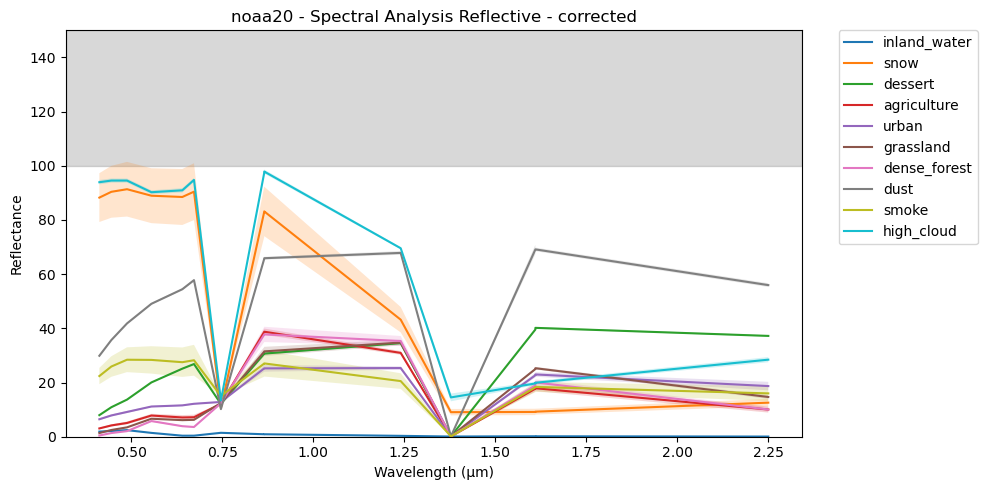

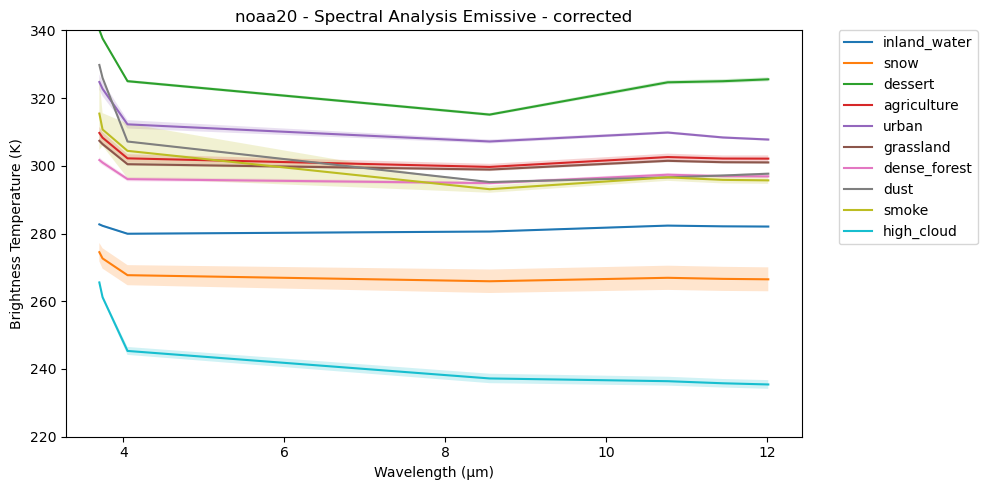

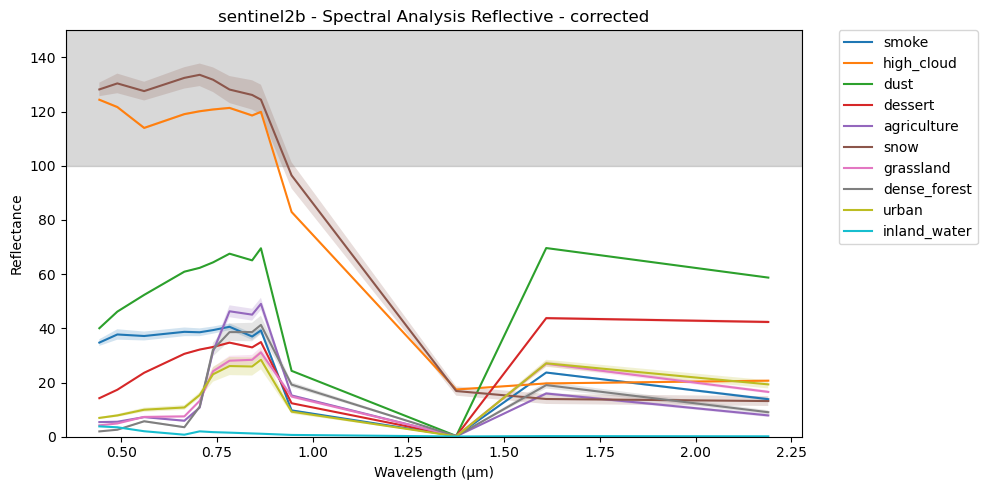

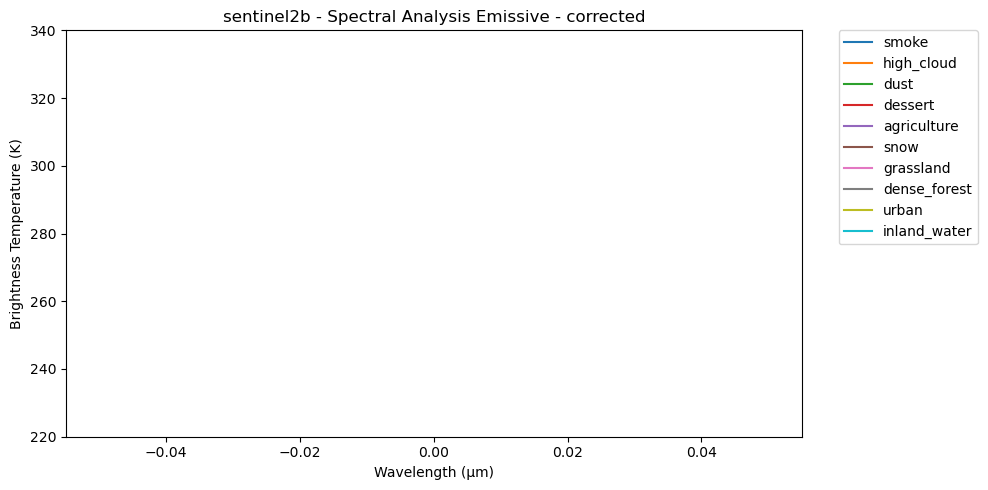

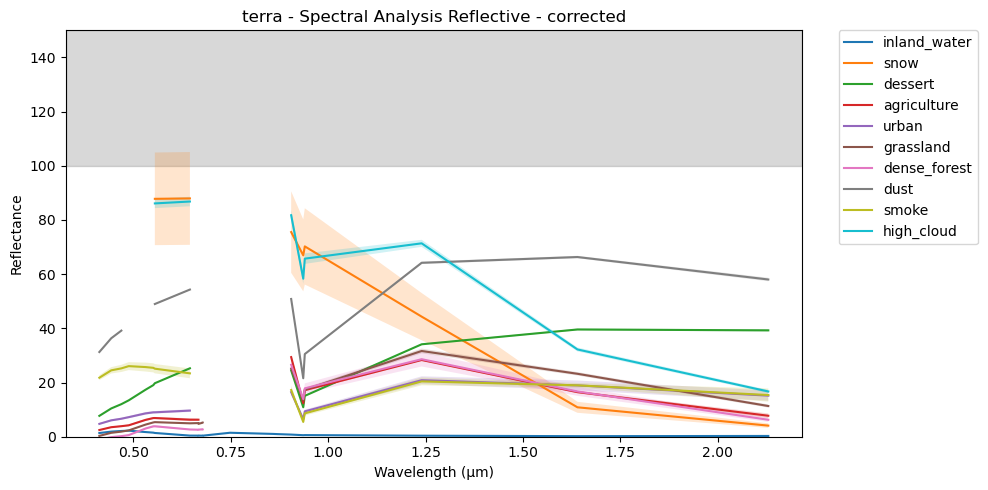

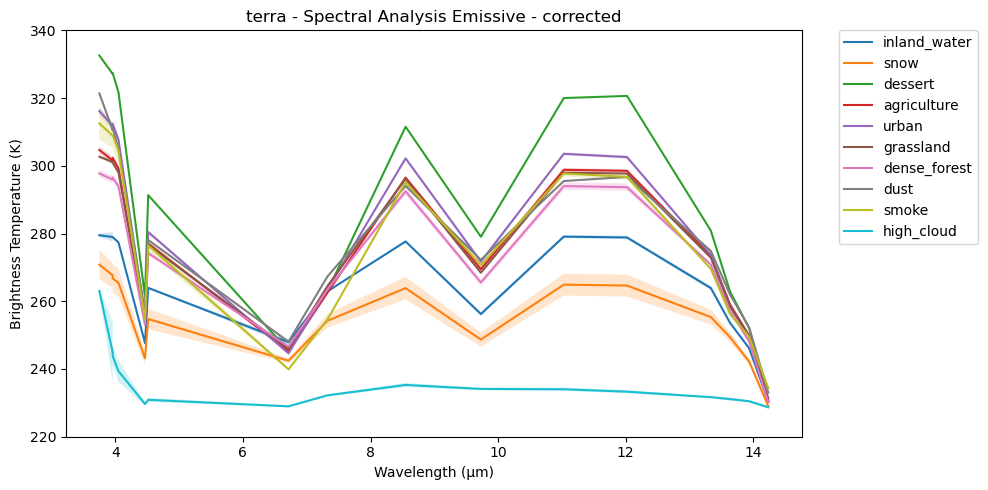

In [12]:
for satname, pixel_classes in spectral_analysis.items():
    cor_type = cor_type_map[satname]

    # --- Reflectance plot ---
    fig, ax = plt.subplots(figsize=(10, 5))

    # Plot data first
    for pixel_class, sa in pixel_classes.items():
        ax.plot(sa['wl_ref_sorted'], sa['reflectance_mean'], label=pixel_class)
        ax.fill_between(
            sa['wl_ref_sorted'],
            sa['reflectance_mean'] - sa['reflectance_stdv'],
            sa['reflectance_mean'] + sa['reflectance_stdv'],
            alpha=0.2
        )

    # Gray fill for unphysical region (>100)
    ax.axhspan(100, 150, color='gray', alpha=0.3, zorder=0)

    ax.set_ylim(0, 150)
    ax.set_title(f'{satname} - Spectral Analysis Reflective - {cor_type}')
    ax.set_xlabel('Wavelength (µm)')
    ax.set_ylabel('Reflectance')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    fig.tight_layout()
    plt.show()

    # --- Brightness temperature plot ---
    fig, ax = plt.subplots(figsize=(10, 5))
    for pixel_class, sa in pixel_classes.items():
        ax.plot(sa['wl_bt_sorted'], sa['brightness_temp_mean'], label=pixel_class)
        ax.fill_between(
            sa['wl_bt_sorted'],
            sa['brightness_temp_mean'] - sa['brightness_temp_stdv'],
            sa['brightness_temp_mean'] + sa['brightness_temp_stdv'],
            alpha=0.2
        )
    ax.set_title(f'{satname} - Spectral Analysis Emissive - {cor_type}')
    ax.set_xlabel('Wavelength (µm)')
    ax.set_ylabel('Brightness Temperature (K)')
    ax.set_ylim(220, 340)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    fig.tight_layout()
    plt.show()